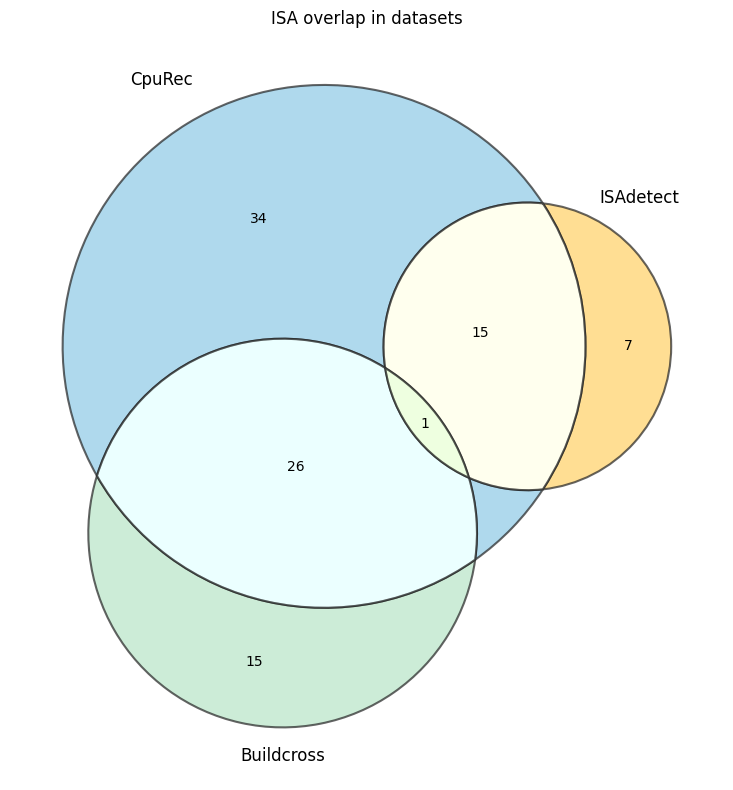

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


# Load the architecture columns from both CSVs
def get_architectures_cpu_rec():
    df = pd.read_csv("../../dataset/cpu_rec-features.csv", sep=";")
    return set(df["architecture"].dropna().astype(str).str.strip())


def get_architectures_buildcross():
    df_cpu_rec = pd.read_csv("../../dataset/cpu_rec-features.csv", sep=";")
    df_buildcross = pd.read_csv("../../dataset/buildcross/labels.csv", sep=";")
    df_buildcross.columns = df_buildcross.columns.str.strip()

    archs = set()
    for arch in df_buildcross["architecture"].dropna().astype(str).str.strip():
        cpu_rec_name = df_cpu_rec[df_cpu_rec["buildcross_name"] == arch][
            "architecture"
        ].values
        archs.add(cpu_rec_name[0] if len(cpu_rec_name) > 0 else arch)

    return archs


def get_architectures_isadetect():
    df_cpu_rec = pd.read_csv("../../dataset/cpu_rec-features.csv", sep=";")
    df_isadetect = pd.read_csv("../../dataset/ISAdetect-features.csv", sep=";")

    archs = set()
    for arch in df_isadetect["architecture"].dropna().str.strip():
        cpu_rec_name = df_cpu_rec[df_cpu_rec["isa_detect_name"] == arch][
            "architecture"
        ].values
        archs.add(cpu_rec_name[0] if len(cpu_rec_name) > 0 else arch)

    return archs


def plot_venn():
    cpu_rec_archs = get_architectures_cpu_rec()
    isadetect_archs = get_architectures_isadetect()
    buildcross_archs = get_architectures_buildcross()
    plt.figure(figsize=(10, 8))
    v = venn3(
        [cpu_rec_archs, isadetect_archs, buildcross_archs],
        set_labels=("CpuRec", "ISAdetect", "Buildcross"),
        set_colors=("#8ecae6", "#ffd166", "#b7e4c7"),  # blue, yellow, green
        alpha=0.7,
    )

    # Add edge colors for clarity
    for patch in ["100", "010", "001", "110", "101", "011", "111"]:
        p = v.get_patch_by_id(patch)
        if p:
            p.set_edgecolor("#222")
            p.set_linewidth(1.5)

    plt.title("ISA overlap in datasets")
    plt.tight_layout()
    plt.savefig("output/dataset-isa-overlap.svg")
    plt.show()


plot_venn()